In [3]:
import numpy as np
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import matplotlib.ticker as ticker
plt.rcParams['text.usetex'] = False
mu_0 = 4 * np.pi * 1e-7  # Vakuumpermeabilität [Vs/(Am)]

dB/dx = (-4.03+/-0.13)e+01 T/m
R² = 0.9951
χ (Graphit) = (-6.69+/-1.01)e-04


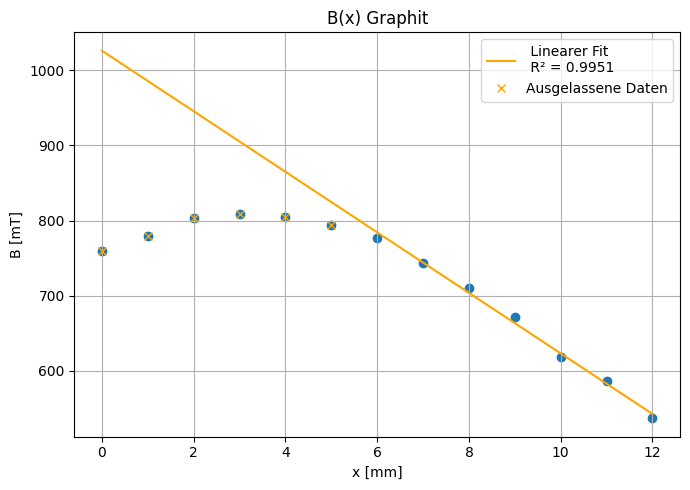

In [9]:
#2 Graphit suszebilität

# CSV-Datei mit graphit mit I=10A
df_faraday = pd.read_csv("graphit.csv")

x = df_faraday['x'].values  # [m]
H = df_faraday['B'].values  # [T]

# Kraftmessung & Volumen
F_x = ufloat(0.22,0) # in [N], unischerheit muss noch
V = ufloat(0.135, 0.02)*1e-7 #ml --> m^3

# Regression über die letzten 6
x_fit = x[6:]
H_fit = H[6:]

slope, intercept, r, _, stderr = linregress(x_fit, H_fit)
dB_dx = ufloat(slope, stderr)


print(f"dB/dx = {dB_dx:.2e} T/m")


#χ für Graphit berechnen

B_x = ufloat(760, 0.5)  #Flussdichte im Probenmittelpunkt

chi = (mu_0 * F_x) / (V * B_x * dB_dx)

print(f"R² = {r**2:.4f}")
print(f"χ (Graphit) = {chi:.2e}")

#Plot B(x) Graphit
plt.figure(figsize=(7, 5))
plt.scatter(x, H)
plt.plot(x, slope * x + intercept, label=f" Linearer Fit\n R² = {r**2:.4f}", color = 'orange')
plt.plot(x[:6], H[:6], 'x', label="Ausgelassene Daten", color = 'orange') 
plt.xlabel("x [mm]")
plt.ylabel("B [mT]")
plt.title("B(x) Graphit")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("/mnt/f/Physik studium/LP2/PS5/Graphitplot.pdf")
plt.show()




In [5]:
# # Titan Suszibilität

# # CSV-Datei Titan
# df_gouy = pd.read_csv("titan_gouy.csv")

# H = df_gouy['B'].values   # T
# F = -0.22 #mN
# B_quadrat = H**2

# # Titan-Querschnitt
# d = ufloat(5e-3,0.05)  # m
# A = ufloat(3e-3, 0.05)

# #Regression F vs. B² und χ Berechnung

# Steigung, intercept, r, p, stderr = linregress(B_quadrat, F)
# Steigung_u = ufloat(Steigung, stderr)

# chi_ti = 2 * mu_0 * Steigung_u / A

# print(f"χ (Titan) = {chi_ti:.2e}")

# #Plot F(B²) Titan
# plt.figure(figsize=(7, 5))
# plt.scatter(B_quadrat, F, label="Messdaten")
# plt.plot(B_quadrat, slope_ti * B_quadrat + intercept, label="Regression")
# plt.xlabel(r"$B^2$ [T$^2$]")
# plt.ylabel(r"$F$ [N]")
# plt.title("F(B²) Titan")
# plt.legend()
# plt.grid()
# plt.tight_layout()
# plt.show()


χ = (1.63+/-0.12)e-04

R² = 0.98053


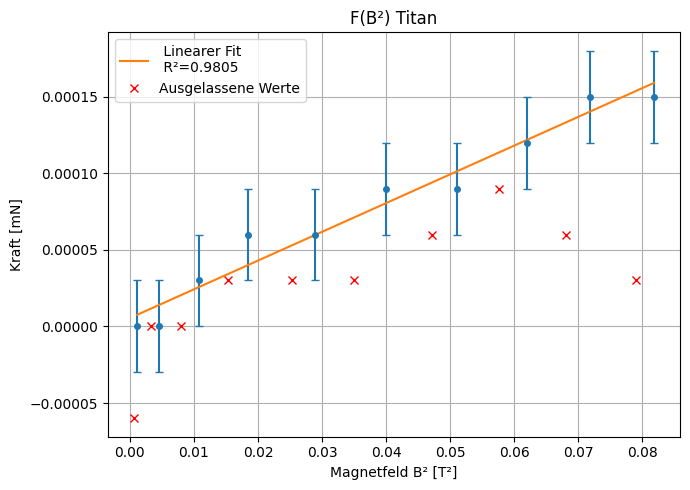

In [6]:
Titan_werte = pd.read_csv("titan_gouy.csv")  # 2 Spalten H [A/m], B [T]
Titan = Titan_werte.iloc[1::2]#.iloc[1:]            #ersten wert auslassen, weil negativ --> ausreißer

Magnetfeld = ((Titan["B"].values)*1e-3)**2 #mT --> T
Kraft = Titan["F"].values*1e-3  #mN --> N
Gerade,Intercept,r,_,stderr=linregress(Magnetfeld,Kraft)

d = ufloat(6.08,0.02)*1e-3  #mm in m 
A = np.pi*((d/2)**2) 

Titan_kackwerte = Titan_werte.iloc[0::2]
Magnetfeld_kaka = ((Titan_kackwerte["B"].values)*1e-3)**2
Kraft_kaka = Titan_kackwerte["F"].values*1e-3

Steigung = ufloat(Gerade, stderr)
chi = (2 * mu_0 * Steigung) / A

#print(f"Steigung={Steigung:.2e} \n")
print(f"χ = {chi:.2e}\n")
print(f"R² = {r:.5f}")

plt.figure(figsize=(7, 5))
plt.errorbar(Magnetfeld, Kraft, fmt='o',yerr=0.00003, capsize=3, markersize=4)
plt.plot(Magnetfeld, Gerade*Magnetfeld+Intercept,markersize=4,label=f" Linearer Fit \n R²={r:.4f}")
plt.plot(Magnetfeld_kaka, Kraft_kaka, 'rx', label="Ausgelassene Werte")
plt.title("F(B²) Titan")
plt.ylabel("Kraft [mN]")
plt.xlabel("Magnetfeld B² [T²]")
plt.grid()
plt.legend()
plt.tight_layout()
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.2f}"))
plt.savefig("/mnt/f/Physik studium/LP2/PS5/Titanplot.pdf")
plt.show()


Br = 0.583 T
Hc = 656.1 A/m
Bs = 1.024 T
Hs = 2446.9 A/m


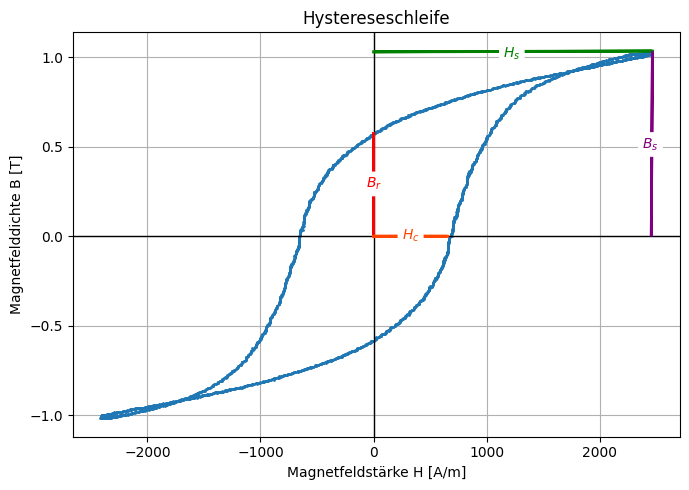

In [7]:
# CSV-Datei Hysteresedaten
df_hyst = pd.read_csv("hysteresekurve.CSV")  # 2 Spalten H [A/m], B [T]
#print(df_hyst.head())

B_y = df_hyst["Uy"].values*1e-1
H_x = df_hyst["Ux"].values*1e-1


R = 70.7*1e3     # Widerstand vom Integrationsglied 70.7kΩ
C = 10.6*1e-6    # Kapazität vom Integrationsglied 10.6μF
n_2 = 788        # Windungszahl sekundärspule 
A = 2.02*1e-4    # Querschnittsfläche Kern 2.02cm^2

n_1 = 197        # Windungsanzahl Primärspule
L = 20*1e-3      # Länge Primärspule 20mm
R_v = 46.4       # Vorwiderstand 46.4Ω

H = (n_1/L)*(H_x/R_v)
B = ((R*C)/(n_2*A))*B_y


# Remanenz: B bei H ≈ 0
idx_H0 = np.argmin(np.abs(H))
Br = abs(B[idx_H0])

# Koerzitivfeldstärke: H bei B ≈ 0
idx_B0 = np.argmin(np.abs(B))
Hc = abs(H[idx_B0])

# Sättigung: Maximum von +B
idx_Bs = np.argmax(np.abs(B))
Bs = B[idx_Bs]

idx_Hs = np.argmax(np.abs(H))
Hs = abs(H[idx_Hs])

print(f"Br = {Br:.3f} T")
print(f"Hc = {Hc:.1f} A/m")
print(f"Bs = {Bs:.3f} T")
print(f"Hs = {Hs:.1f} A/m")

# Plot Hystereseschleife B(H)
plt.figure(figsize=(7, 5))
plt.arrow(0, Bs+0.005, Hs+20, 0.005, color='green',zorder=10, linewidth=2)
plt.arrow(Hs+10, 0, 10, Bs+0.005, color='purple',zorder=10, linewidth=2)
plt.arrow(0, 0, 0, Br-0.01, color='red',zorder=10, linewidth=2)
plt.arrow(0, 0, Hc, 0, color='orangered',zorder=10, linewidth=2)

plt.text(Hs/2, Bs -0.05, r"$H_s$", color='green', ha='center', va='bottom', 
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'),zorder=10)
plt.text(Hs - 70, Bs/2, r"$B_s$", color='purple', ha='left', va='center', 
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'),zorder=10)
plt.text(-70, Br/2, r"$B_r$", color='red', ha='left', va='center', 
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'),zorder=10)  # small offset for visibility
plt.text(Hc/2, 0.05, r"$H_c$", color='orangered', ha='center', va='top', 
         bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'),zorder=10)

plt.plot(H,B, 'o', markersize=1)
plt.title("Hystereseschleife")
plt.ylabel("Magnetfelddichte B [T]")
plt.xlabel("Magnetfeldstärke H [A/m]")
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)


plt.grid()
plt.tight_layout()
plt.savefig("/mnt/f/Physik studium/LP2/PS5/Hystereschleife.pdf")
plt.show() 


Permeabilität μ_r-max = 723.19
Suszeptibilität χ = 722.19

R² = 0.9955


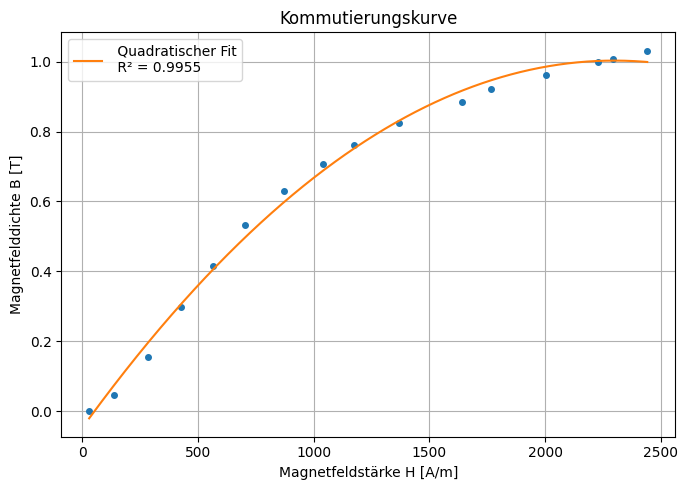

In [8]:
# Plot Kommutierungskurve

df_hyst = pd.read_csv("Kommutierungskurve.CSV")  # 2 Spalten H [A/m], B [T]
B_y = df_hyst["Uy_V"].values*1e-1
H_x = df_hyst["Ux_V"].values*1e-1

R = 70.7*1e3     # Widerstand vom Integrationsglied 70.7kΩ
C = 10.6*1e-6    # Kapazität vom Integrationsglied 10.6μF
n_2 = 788        # Windungszahl sekundärspule 
A = 2.02*1e-4    # Querschnittsfläche Kern 2.02cm^2

n_1 = 197        # Windungsanzahl Primärspule
L = 20*1e-3      # Länge Primärspule 20mm
R_v = 46.4       # Vorwiderstand 46.4Ω

H = (n_1/L)*(H_x/R_v)
B = ((R*C)/(n_2*A))*B_y

sort_idx = np.argsort(H)
H_sorted = H[sort_idx]
B_sorted = B[sort_idx]

#Kurvenfit

coeff = a,b,c = np.polyfit(H, B, deg=2)
H_fit = np.linspace(min(H), max(H), 1000)
B_fit = a * H_fit**2 + b * H_fit + c

B_r = np.polyval(coeff , H)

SS_res = np.sum((B - B_r)**2)
SS_tot = np.sum((B - np.mean(B))**2)
r_squared = 1 - (SS_res / SS_tot)


#Berechnung von Chi und Mu mittels dB/dH
mu_H = np.gradient(B, H)
mu_r = mu_H / mu_0
mu_r_max = np.max(mu_r)
chi_max = mu_r_max - 1


print(f"Permeabilität μ_r-max = {mu_r_max:.2f}")
print(f"Suszeptibilität χ = {chi_max:.2f}\n")

print(f"R² = {r_squared:.4f}")

plt.figure(figsize=(7, 5))
plt.plot(H, B, 'o', markersize=4)
plt.plot(H_fit, B_fit, '-', label = f" Quadratischer Fit\n R² = {r_squared:.4f}")
plt.title("Kommutierungskurve")
plt.ylabel("Magnetfelddichte B [T]")
plt.xlabel("Magnetfeldstärke H [A/m]")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("/mnt/f/Physik studium/LP2/PS5/Kommutierungskurve.pdf")
plt.show()